# Avocado Project

Project Description

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g.greenskins) are not included in this table

Some relevant columns in the dataset:
•	Date - The date of the observation
•	AveragePrice - the average price of a single avocado
•	type - conventional or organic
•	year - the year
•	Region - the city or region of the observation
•	Total Volume - Total number of avocados sold
•	4046 - Total number of avocados with PLU 4046 sold
•	4225 - Total number of avocados with PLU 4225 sold
•	4770 - Total number of avocados with PLU 4770 sold


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import scipy as stats
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In the above dataset we have 18249 rows and 14 columns including both dependent and indpendent variables.

The aim is to predict the average price which is continuous in nature and which is our target variable.

Further we will use Regresson models to predict the price of the fruit.

In [3]:
df.drop("Unnamed: 0",axis=1, inplace=True)

From the drop method we are dropping the unnamed column because in the above dataset unnamed column has does not provided any information to the dataset

In [4]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Provides the detail of the first 5 columns of the dataset

In [5]:
df.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


Provides the detail of the last 5 columns of the dataset

In [6]:
# Checking the dimension of the dataset
df.shape

(18249, 13)

In the above dataset there are 18249 rows and 13 columns
Out of 13 columns, 12 are different input features and one column average price is the label or target variable .


In [7]:
# Checking the types of the dataset
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

The above columns in the dataset contain three different types of data float, integer and object data type. 
Further the dtype of the dataset is object




In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


This method describe the information about the dataset which includes dtype of columns which consist 9 columns for float datatype,3 cloumns for object and 1 column for integer
with different feature columns.

Further no-null values are present in the dataset

The whole memory usage of the dataset is 1.8+MB

In [9]:
#Checking unique values in dataset
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

The above information shows different unique values present in  the dataset.
In total volume the highest unique value is present 

In [10]:
df['Date']=pd.to_datetime(df['Date'])

In [11]:
# Checking null values in the dataset
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In the above dataset there is no null value present 

In [12]:
df["Month"] = df["Date"].dt.month

In [13]:
df["Day"] = df["Date"].dt.day

In [14]:
df.drop("Date",axis=1,inplace=True)

In [15]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


<AxesSubplot:>

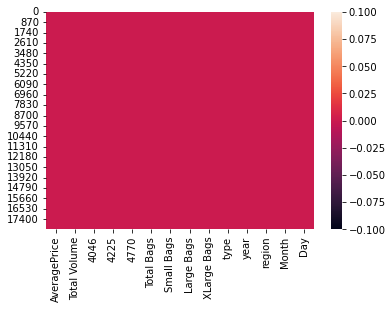

In [16]:
sns.heatmap(df.isnull())

In [17]:
#to know all the columns of the dataset
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month', 'Day'],
      dtype='object')

This method shows the different column name provide to different features

In [18]:
# Checking the uniqueness of target variable
df['AveragePrice'].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

This shows the number of unique value present in the target variable 

In [19]:
# Checking dataset containing any space
df.loc[df['AveragePrice']==" "]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day


The above information shows that there is no space in the dataset

In [20]:
# Statistical summary of dataset
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


The above method gives the statistical information of the dataset.

 In the dataset there are no negative/ invalid values present.

The counts of all the columns are same.

There are no null values present in the dataset.

In the target variable average price mean is slightly greater than median, means it is skewed to right.

The minimum price of the single fruit avocado is 0.44 dollars and maximum is 3.25.

The mean and the median(50%) are very close to each other in most of the columns.

The mean is greater than the median in most of the columns which means they are skewed to right.

In some of the columns median is greater than the mean, hence they are skewed to left.

Further the difference between max and 75% we can find that there are outliers present in most of the column. 




In [21]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
Month            0.106617
Day              0.014310
dtype: float64

The acceptable range for skewness is between +/-0.5.
Further in the above data all feature columns have skewness


In [22]:
category_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        category_col.append(i)
print(category_col)

['type', 'region']


This method show shows the category columns present in the dataset

In [23]:
number_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        number_col.append(i)
print(number_col)

['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day']


This method show shows the numerical columns present in the dataset

conventional    9126
organic         9123
Name: type, dtype: int64


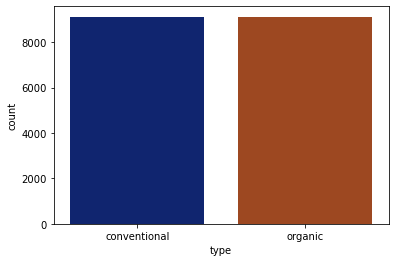

In [24]:
#Visualize the count of type of the avocado
print(df['type'].value_counts())
sns.countplot(x='type', data=df, palette="dark")
plt.show()

From the above visualization we find the both conventionl and organic avocado are in demand and equal in counts



2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


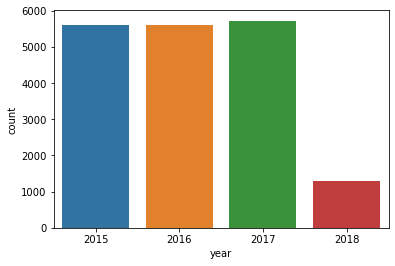

<Figure size 720x432 with 0 Axes>

In [25]:
print(df['year'].value_counts())
sns.countplot(x='year', data=df)
plt.figure(figsize=(10,6))
plt.show()

The above plot show the count in 2017 year  is 5722, whereas in 2016,2015 and 2018 year the price and the sale of avocado is less

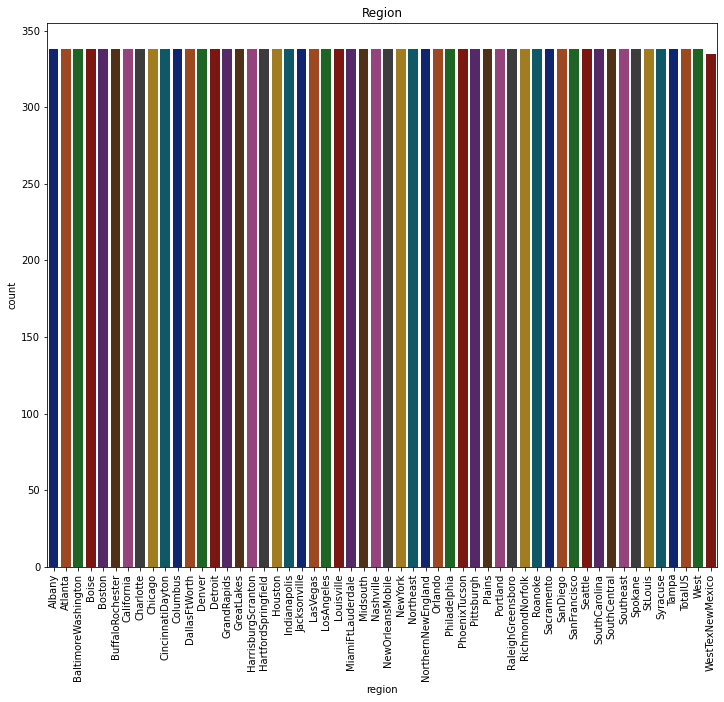

In [26]:
plt.figure(figsize=(12,10))
sns.countplot(df["region"],palette="dark")
plt.title("Region")
plt.xticks(rotation=90)
plt.show()

From the above solution we find  the count of avocado is same in all the regions.

But WestTexNewMexico has little bit count as compared with others.


1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


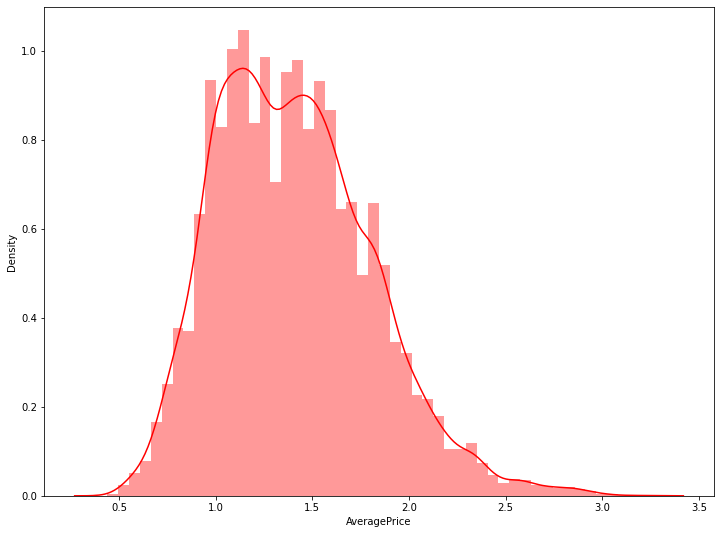

In [27]:
print(df["AveragePrice"].value_counts())
plt.figure(figsize=(12,9))
sns.distplot(df["AveragePrice"], color="red")
plt.show()

From the above plot we find that the target variable average price is normally distributed

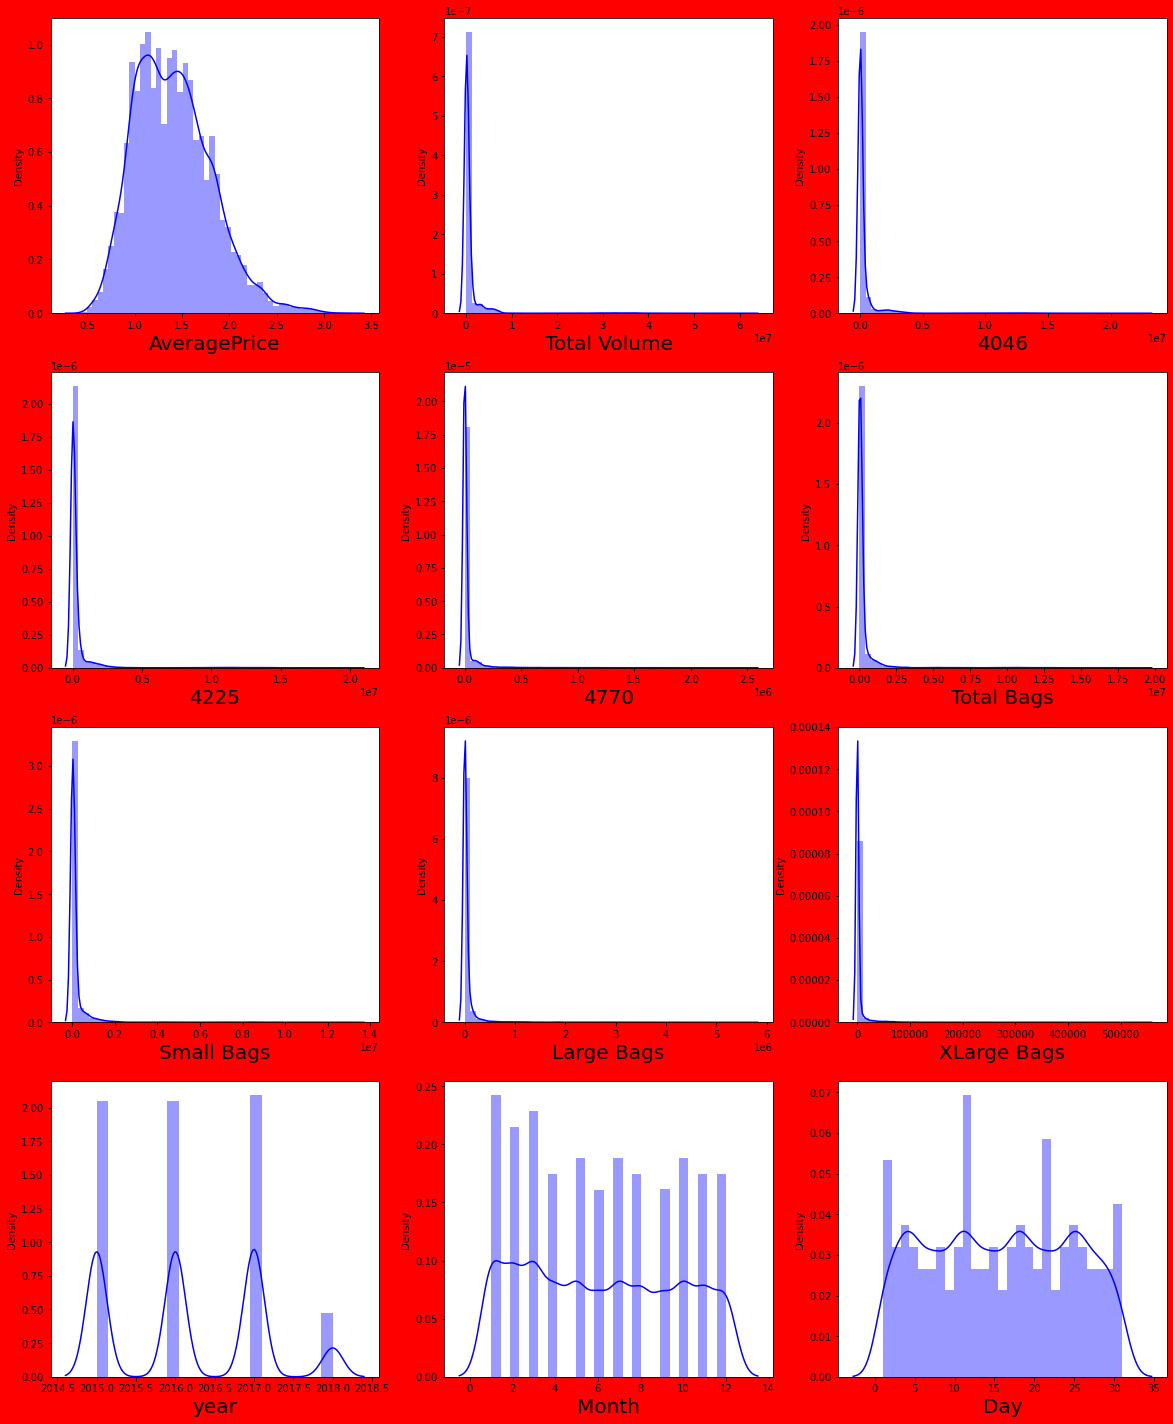

In [28]:
plt.figure(figsize=(20,25), facecolor='red')
plotnumber = 1

for column in number_col:
    if plotnumber<=14:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

From the above distplots we find that none of the columns are normally distributed accept our target  variable AveragePrice 

Further all the  columns contains huge skewness.



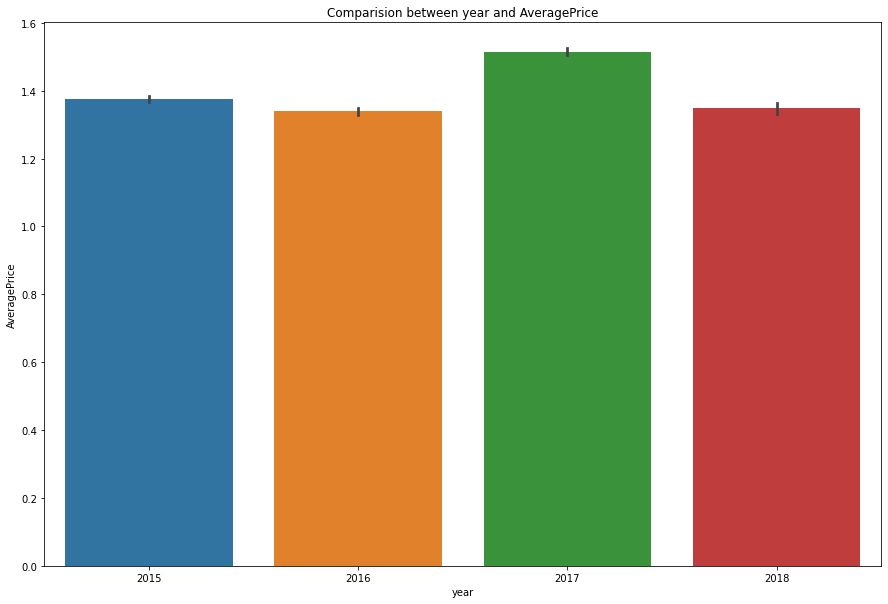

In [29]:
#Bivariate Analysis
plt.figure(figsize=(15,10))
plt.title('Comparision between year and AveragePrice')
sns.barplot(df['year'],df['AveragePrice'], data=df);
plt.xlabel("year")
plt.ylabel("AveragePrice")
plt.show()

The above barplot shows that the AveragePrice is maximum in the year 2017.

<Figure size 720x576 with 0 Axes>

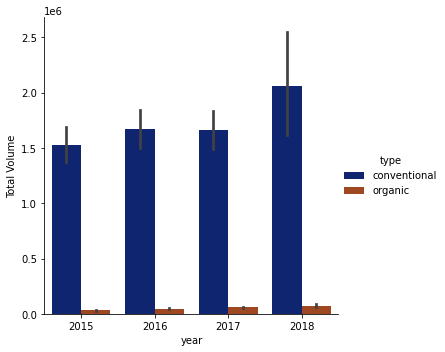

In [30]:
plt.figure(figsize=(10,8))
sns.catplot(x="year", y="Total Volume", hue="type", kind="bar", data=df, palette="dark")
plt.show()

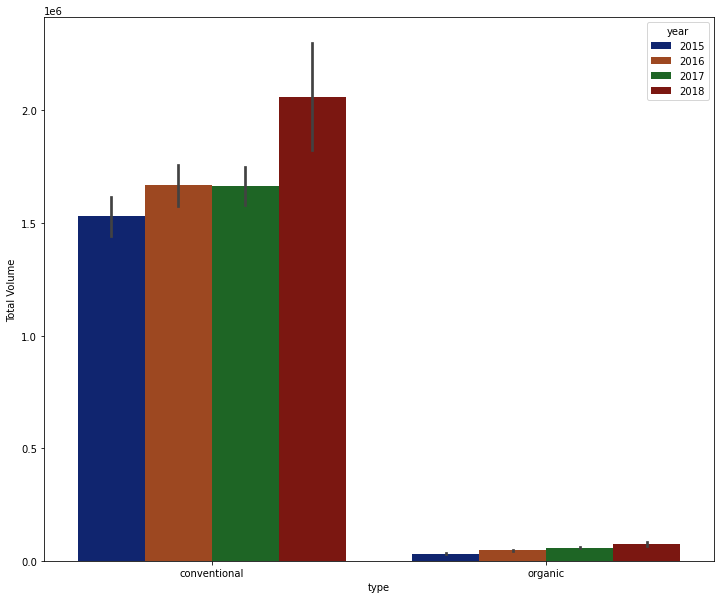

In [31]:
plt.figure(figsize=(12,10))
sns.barplot(x='type',y='Total Volume',hue="year",data=df,palette="dark",ci=68)
plt.show()

<Figure size 1080x720 with 0 Axes>

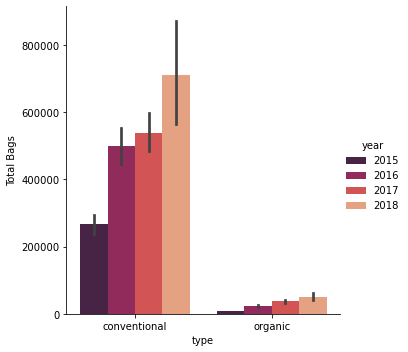

In [32]:
plt.figure(figsize=(15,10))
sns.catplot(x="type", y="Total Bags", hue="year", data=df, kind="bar", palette="rocket")
plt.show()

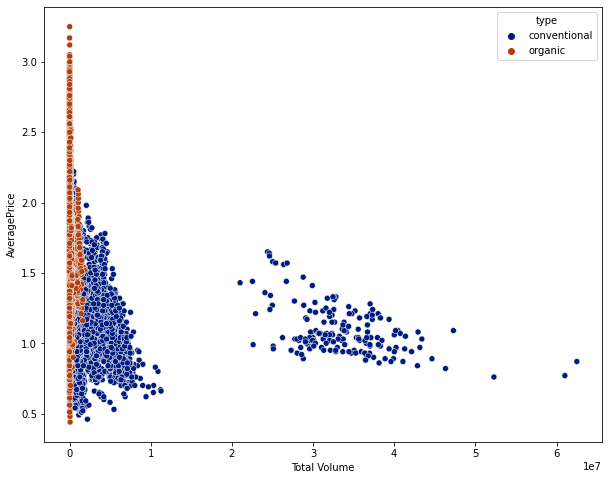

In [33]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="Total Volume",y="AveragePrice",hue="type",data=df,palette="dark")
plt.show()

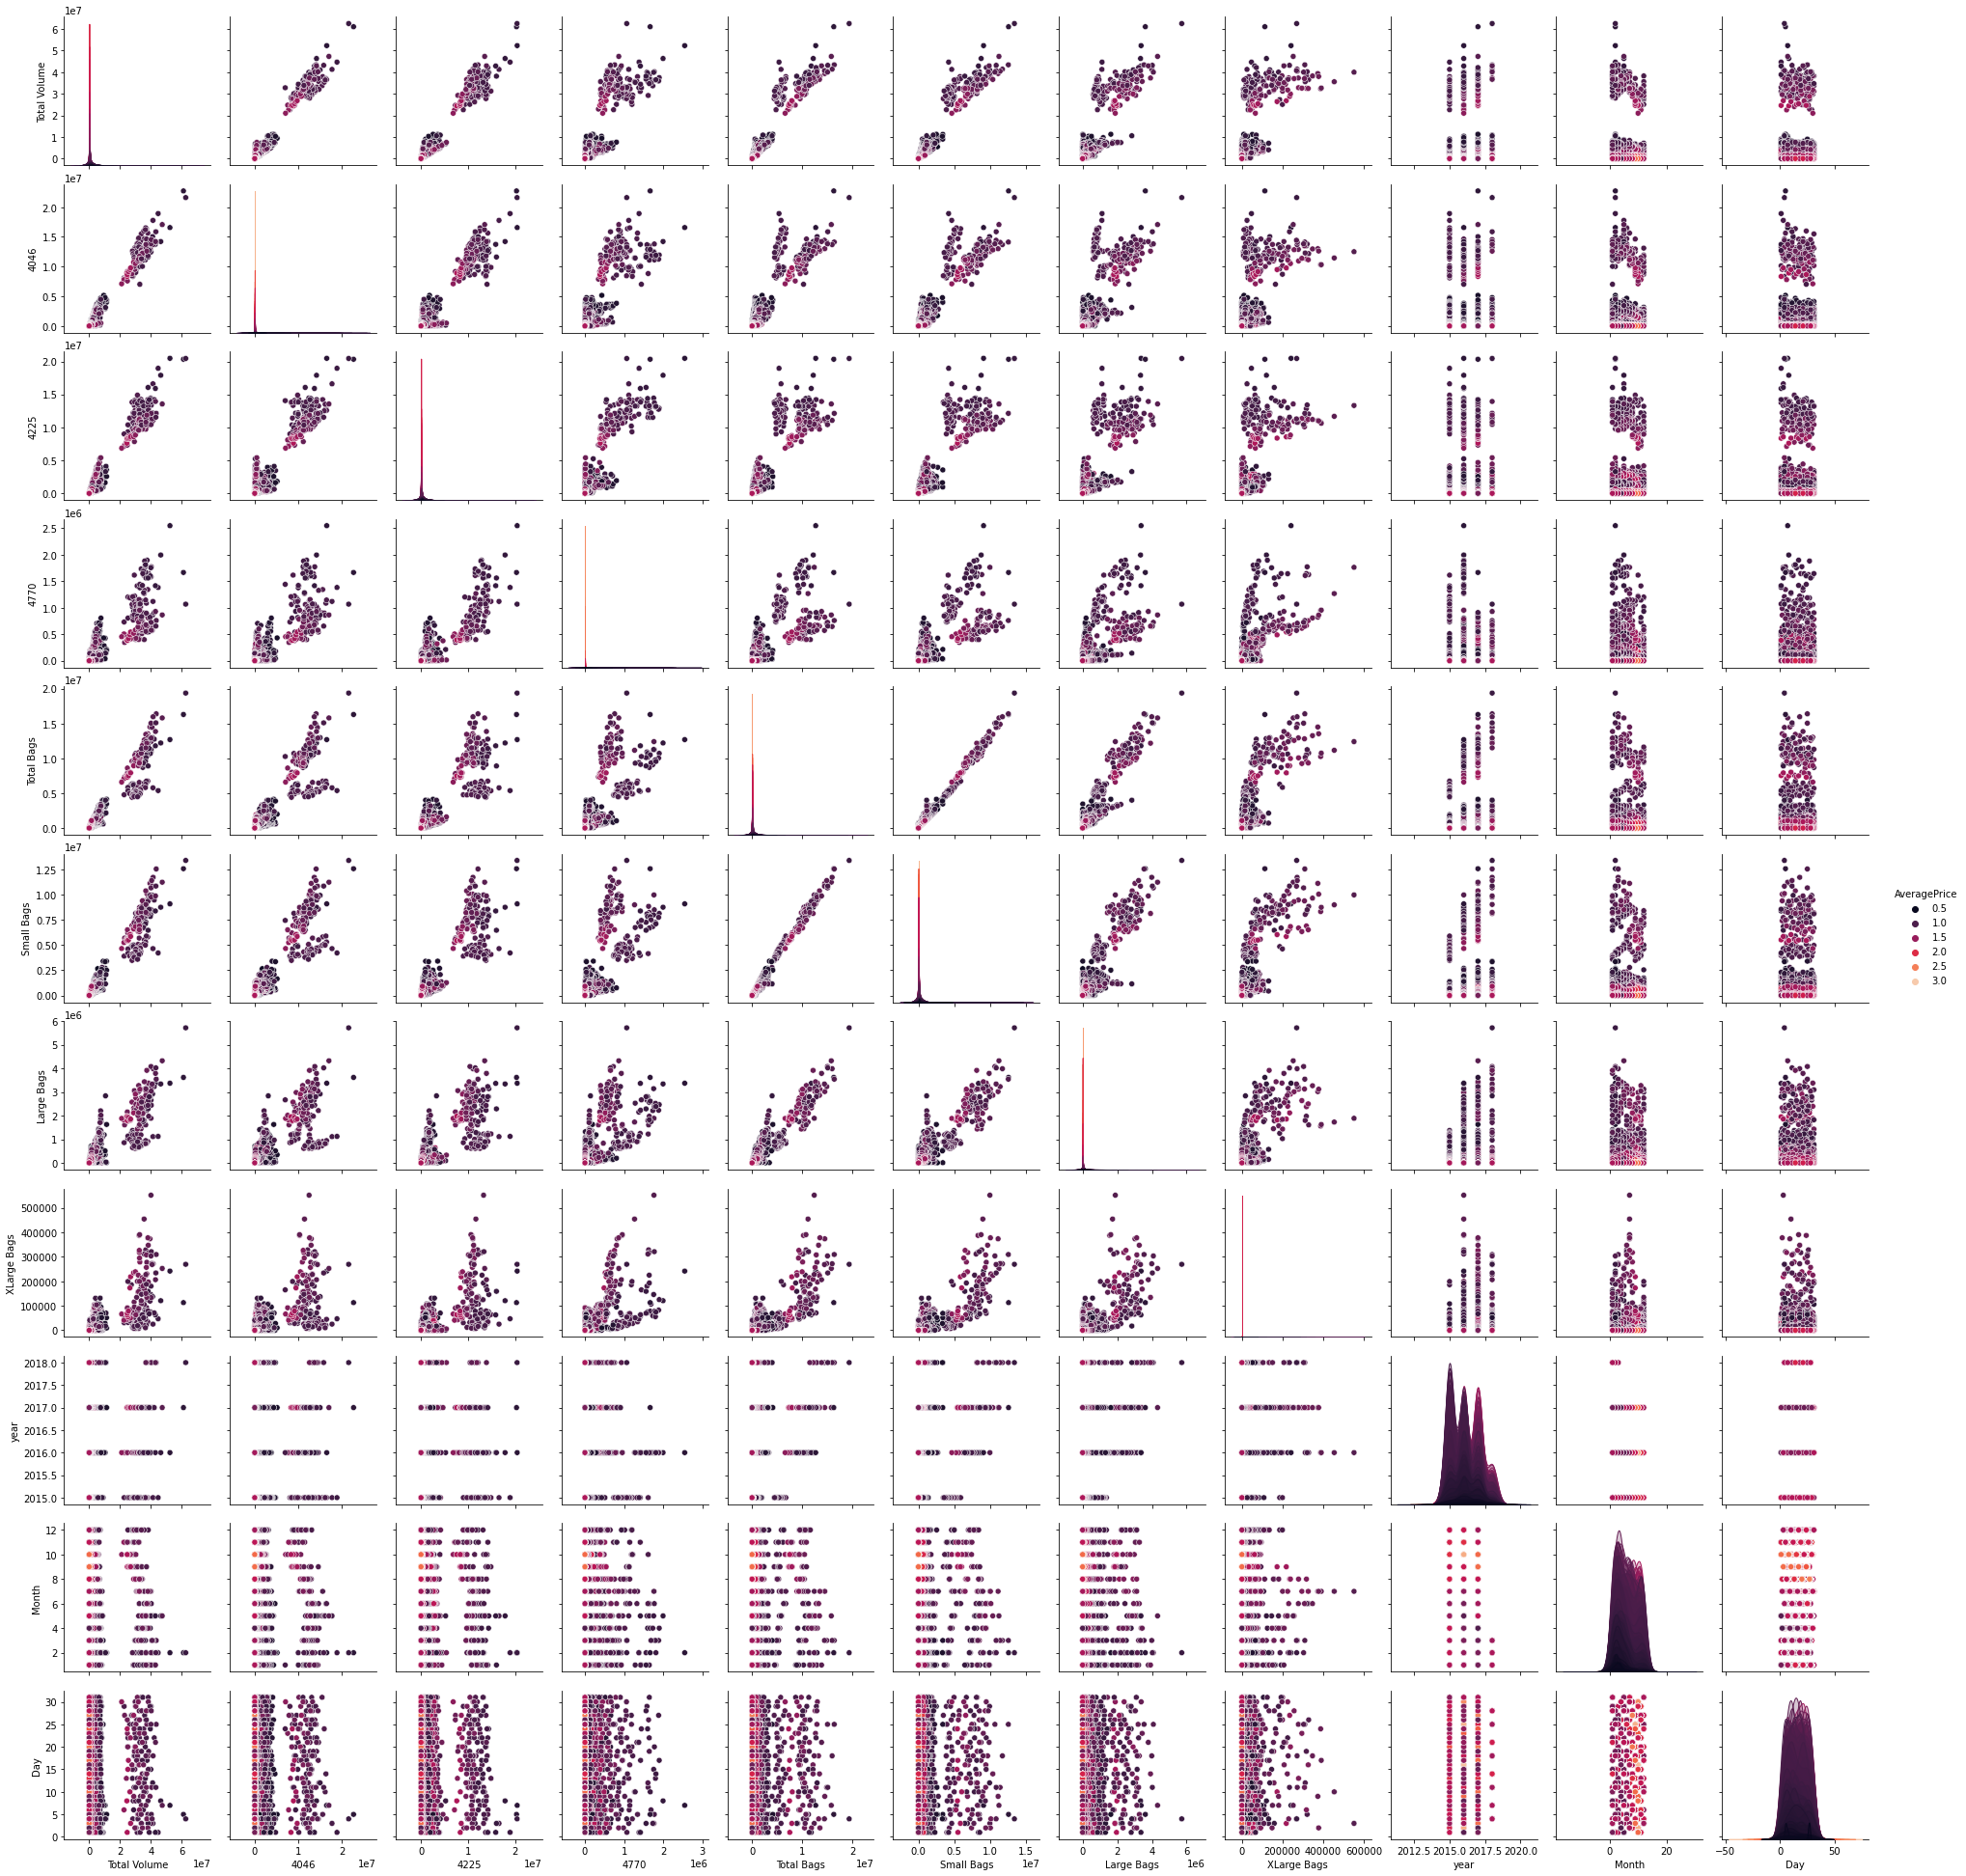

In [34]:
sns.pairplot(df,hue="AveragePrice",palette="rocket")

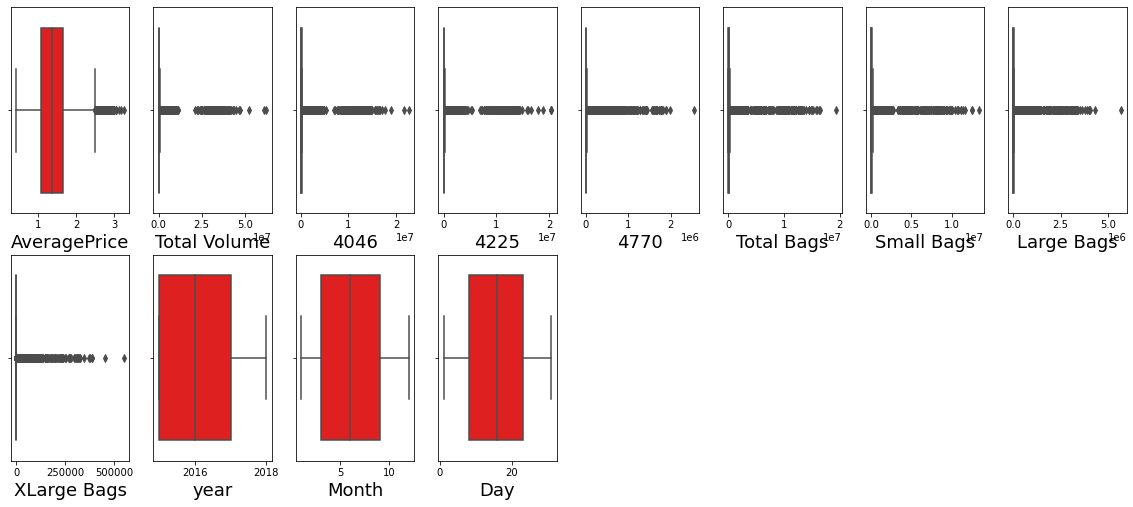

In [35]:
number_col=['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year','Month','Day']
plt.figure(figsize=(20,22), facecolor='white')
plotnumber = 1

for column in number_col:
    if plotnumber<=18:
        ax = plt.subplot(5,8,plotnumber)
        sns.boxplot(df[column],color='red')
        plt.xlabel(column,fontsize=18)
    plotnumber+=1
plt.show()

From the above plot we find that accept year,month and day all the other columns have outliers.

In [36]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month', 'Day'],
      dtype='object')

In [37]:
features = df[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]

In [38]:
from scipy.stats import zscore

z=np.abs(zscore(features))

z

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558
1,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558
2,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558
3,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558
4,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558
...,...,...,...,...,...,...,...,...
18244,0.241373,0.230017,0.243857,0.212540,0.229301,0.226665,0.220964,0.17558
18245,0.242296,0.230693,0.242277,0.212540,0.233594,0.232196,0.221403,0.17558
18246,0.242331,0.230693,0.243090,0.205766,0.233463,0.231644,0.222561,0.17558
18247,0.241625,0.230428,0.242651,0.205774,0.231866,0.229543,0.222529,0.17558


In [39]:
new_df = df[(z<3).all(axis=1)] 
new_df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


After removing the outlier the newdata frame consist 11782 rows and 14 columns

In [40]:
df.shape

(18249, 14)

The above method shows the shape of original dataset which consist the 18249 rows and 14 columns 

In [41]:
new_df.shape

(17782, 14)

After removing the outliers we have new dataset with 17782 rows and 14 columns 

In [42]:
Ldata = (18249-17782)/18249*100
Ldata

2.55904433119623

In [43]:
Q1=features.quantile(0.25)

Q3=features.quantile(0.75)

IQR=Q3 - Q1

df1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [44]:
df1.shape

(11747, 14)

In [45]:
Ldata = (18249-11747)/18249*100
Ldata

35.62934955340019

In IQR method we are losing more data as compared to Zscore 

In [46]:
new_df.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

In the above data all the columns have skewness except year, Month and Day.
Further our average price which is our target variable also have skewness present

In [47]:
features = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or  '
'''

"\nparameters:\nmethod = 'box-cox' or  '\n"

In [48]:
new_df[features] = scaler.fit_transform(new_df[features].values)
new_df[features].head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.675702
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.675702
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.675702
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.675702
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.675702


In [49]:
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

After performing the 'yeo-johnson' method there is still skewness in XLarge Bags columns

In [50]:
new_df["XLarge Bags"] = np.log1p(new_df["XLarge Bags"])

In [51]:
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.791499
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

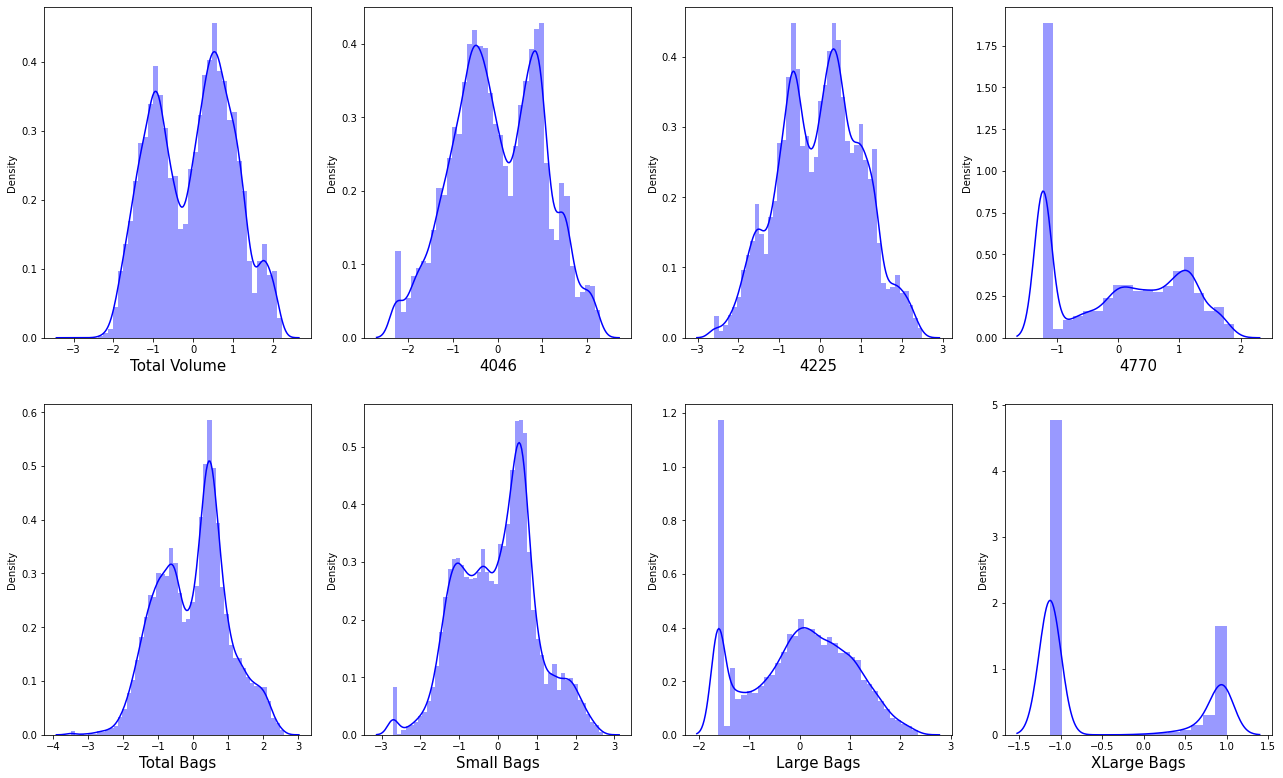

In [52]:
plt.figure(figsize=(22,28), facecolor='white')
plotnumber = 1

for column in new_df[features]:
    if plotnumber<=9:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(new_df[column],color='blue')
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

In [53]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
new_df['region']=OE.fit_transform(new_df['region'].values.reshape(-1,1))
new_df['type']=OE.fit_transform(new_df['type'].values.reshape(-1,1))
new_df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-1.126094,0.0,2015,0.0,12,27
1,1.35,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-1.126094,0.0,2015,0.0,12,20
2,0.93,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-1.126094,0.0,2015,0.0,12,13
3,1.08,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-1.126094,0.0,2015,0.0,12,6
4,1.28,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-1.126094,0.0,2015,0.0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,-0.668931,-0.454078,-0.922232,-1.224990,-0.331042,-0.165765,-0.405895,-1.126094,1.0,2018,53.0,2,4
18245,1.71,-0.762380,-0.610403,-0.665649,-1.224990,-0.499550,-0.321645,-0.478556,-1.126094,1.0,2018,53.0,1,28
18246,1.87,-0.766344,-0.610350,-0.774395,0.455355,-0.493424,-0.303466,-0.945246,-1.126094,1.0,2018,53.0,1,21
18247,1.93,-0.692595,-0.539211,-0.711605,0.455045,-0.424475,-0.240252,-0.910471,-1.126094,1.0,2018,53.0,1,14


In [54]:
correlation = new_df.corr()
correlation

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.576829,-0.548618,-0.448579,-0.491320,-0.564616,-0.493621,-0.477879,-0.392262,0.608447,0.099910,0.010428,0.157900,0.024742
Total Volume,-0.576829,1.000000,0.889083,0.924160,0.818568,0.939776,0.905098,0.681427,0.629752,-0.800828,0.076584,0.065709,-0.026332,-0.006248
4046,-0.548618,0.889083,1.000000,0.764679,0.736523,0.799354,0.778765,0.601899,0.575152,-0.725826,-0.002396,0.159390,-0.025919,-0.004558
4225,-0.448579,0.924160,0.764679,1.000000,0.796799,0.818511,0.784901,0.614878,0.583293,-0.747722,-0.004533,0.032273,-0.024708,-0.005919
4770,-0.491320,0.818568,0.736523,0.796799,1.000000,0.761641,0.754305,0.548457,0.617192,-0.780988,-0.051657,0.037805,-0.017377,0.001383
Total Bags,-0.564616,0.939776,0.799354,0.818511,0.761641,1.000000,0.949901,0.729652,0.612530,-0.725686,0.210924,0.065996,-0.014571,-0.003703
Small Bags,-0.493621,0.905098,0.778765,0.784901,0.754305,0.949901,1.000000,0.566307,0.601404,-0.720466,0.185955,0.051985,-0.010260,-0.000535
Large Bags,-0.477879,0.681427,0.601899,0.614878,0.548457,0.729652,0.566307,1.000000,0.451796,-0.500026,0.190295,0.086573,-0.016942,-0.000876
XLarge Bags,-0.392262,0.629752,0.575152,0.583293,0.617192,0.612530,0.601404,0.451796,1.000000,-0.672461,0.156202,-0.017598,0.020885,0.010991
type,0.608447,-0.800828,-0.725826,-0.747722,-0.780988,-0.725686,-0.720466,-0.500026,-0.672461,1.000000,0.007399,0.021970,-0.005044,-0.002469


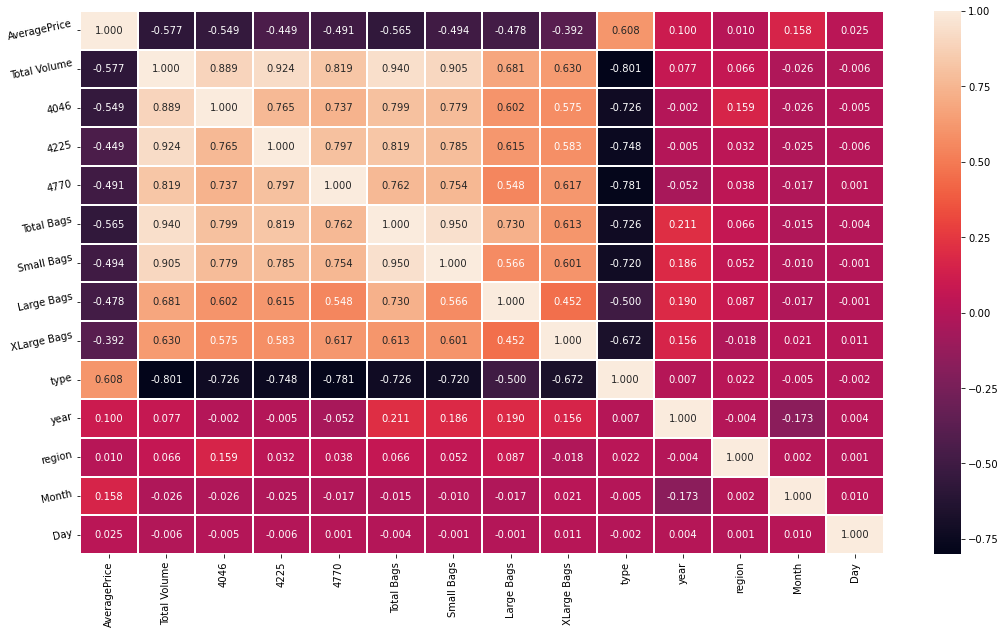

In [55]:
plt.figure(figsize=(18,10))
sns.heatmap(new_df.corr(),linewidths=.1,fmt='0.3f', annot = True)
plt.yticks(rotation=12);

The above heatmap shows the correlation matrix by visualizing the data. 
The correlation provides the relation between one feature to another.
The heat map contains both positive and negative correlation.
In the above data all the  features are highly negatively correlated with the output variable
Columns year, Month and type have positive correlation with the target.



In [56]:
correlation['AveragePrice'].sort_values(ascending=False)

AveragePrice    1.000000
type            0.608447
Month           0.157900
year            0.099910
Day             0.024742
region          0.010428
XLarge Bags    -0.392262
4225           -0.448579
Large Bags     -0.477879
4770           -0.491320
Small Bags     -0.493621
4046           -0.548618
Total Bags     -0.564616
Total Volume   -0.576829
Name: AveragePrice, dtype: float64

The above data shows the both negative and positve correlation.

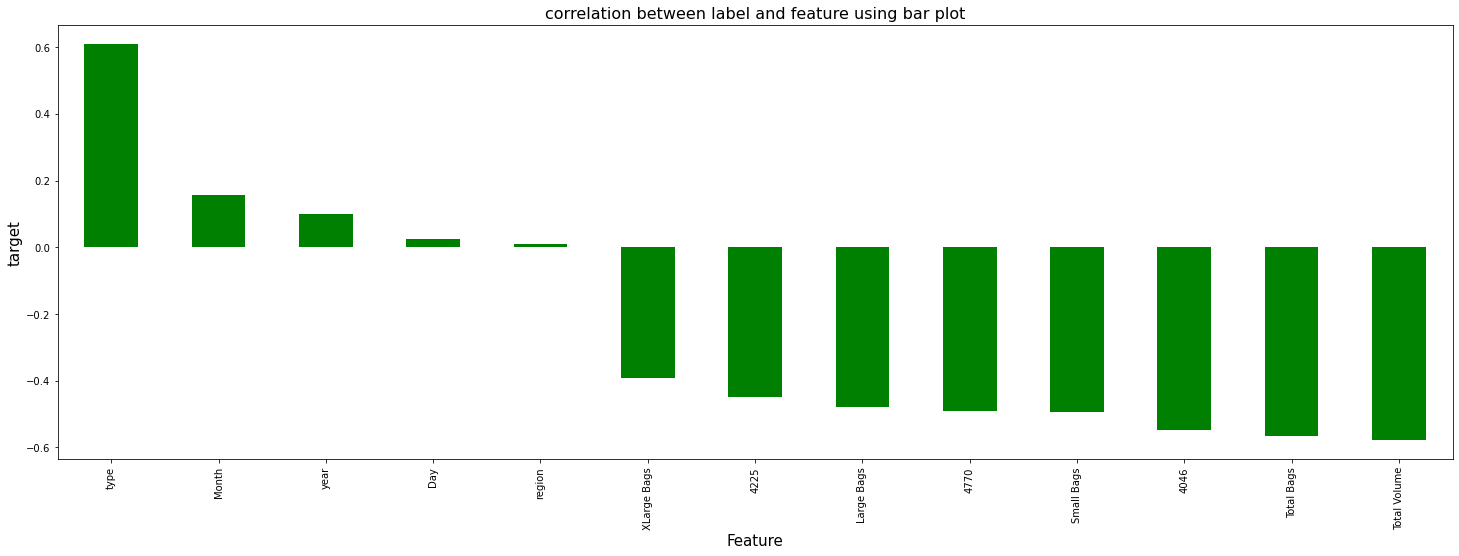

In [57]:
plt.figure(figsize=(25,8))
new_df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('target',fontsize=15)
plt.title('correlation between label and feature using bar plot',fontsize=16)
plt.show()

The above plot show the region and Day have very less correlation with label column.


In [58]:
new_df.drop("region",axis=1, inplace=True)


In [59]:
new_df.drop("Day",axis=1, inplace=True)

In [60]:
new_df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month
0,1.33,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-1.126094,0.0,2015,12
1,1.35,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-1.126094,0.0,2015,12
2,0.93,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-1.126094,0.0,2015,12
3,1.08,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-1.126094,0.0,2015,12
4,1.28,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-1.126094,0.0,2015,11
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,-0.668931,-0.454078,-0.922232,-1.224990,-0.331042,-0.165765,-0.405895,-1.126094,1.0,2018,2
18245,1.71,-0.762380,-0.610403,-0.665649,-1.224990,-0.499550,-0.321645,-0.478556,-1.126094,1.0,2018,1
18246,1.87,-0.766344,-0.610350,-0.774395,0.455355,-0.493424,-0.303466,-0.945246,-1.126094,1.0,2018,1
18247,1.93,-0.692595,-0.539211,-0.711605,0.455045,-0.424475,-0.240252,-0.910471,-1.126094,1.0,2018,1


After droping the day and region column, now we have 17782 rows and 12 columns

In [61]:
x = new_df.drop("AveragePrice", axis=1)
y = new_df["AveragePrice"]

In [62]:
x.shape

(17782, 11)

In [63]:
y.shape

(17782,)

In [64]:
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-1.126094,0.0,2015,12
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-1.126094,0.0,2015,12
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-1.126094,0.0,2015,12
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-1.126094,0.0,2015,12
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-1.126094,0.0,2015,11


In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.685946,-1.026443,-1.214908,1.641434
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.685946,-1.026443,-1.214908,1.641434
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.685946,-1.026443,-1.214908,1.641434
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.685946,-1.026443,-1.214908,1.641434
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.685946,-1.026443,-1.214908,1.358706
...,...,...,...,...,...,...,...,...,...,...,...
17777,-0.668931,-0.454078,-0.922232,-1.224990,-0.331042,-0.165765,-0.405895,-0.685946,0.974238,1.979143,-1.185845
17778,-0.762380,-0.610403,-0.665649,-1.224990,-0.499550,-0.321645,-0.478556,-0.685946,0.974238,1.979143,-1.468572
17779,-0.766344,-0.610350,-0.774395,0.455355,-0.493424,-0.303466,-0.945246,-0.685946,0.974238,1.979143,-1.468572
17780,-0.692595,-0.539211,-0.711605,0.455045,-0.424475,-0.240252,-0.910471,-0.685946,0.974238,1.979143,-1.468572


In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_calc():
    vif = pd.DataFrame()
    vif["VIF factor"] = [variance_inflation_factor(x.values,i)
                         for i in range(x.shape[1])]
    vif["Features"] = x.columns
    print(vif)

In [67]:
vif_calc()

    VIF factor      Features
0    51.806476  Total Volume
1     6.808776          4046
2    11.158951          4225
3     3.951861          4770
4    34.441003    Total Bags
5    16.630696    Small Bags
6     3.462408    Large Bags
7     2.065369   XLarge Bags
8     3.720176          type
9     1.386160          year
10    1.053985         Month


The above data show the vif values more than 10 in different features columns

In [68]:
x.drop("Total Volume",axis=1, inplace=True)

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_calc():
    vif = pd.DataFrame()
    vif["VIF factor"] = [variance_inflation_factor(x.values,i)
                         for i in range(x.shape[1])]
    vif["Features"] = x.columns
    print(vif)

In [70]:
vif_calc()

   VIF factor     Features
0    3.546068         4046
1    4.272321         4225
2    3.936681         4770
3   24.479948   Total Bags
4   16.630524   Small Bags
5    3.419283   Large Bags
6    2.053729  XLarge Bags
7    3.487456         type
8    1.383630         year
9    1.051817        Month


In [71]:
x.drop("Total Bags",axis=1, inplace=True)

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_calc():
    vif = pd.DataFrame()
    vif["VIF factor"] = [variance_inflation_factor(x.values,i)
                         for i in range(x.shape[1])]
    vif["Features"] = x.columns
    print(vif)

In [73]:
vif_calc()

   VIF factor     Features
0    3.527072         4046
1    4.127765         4225
2    3.936426         4770
3    4.098464   Small Bags
4    1.864199   Large Bags
5    2.053482  XLarge Bags
6    3.484298         type
7    1.359151         year
8    1.051183        Month


After removing the few columns with high vif value,now our dataset contains the vif values less than 10

In [74]:
x.head()

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,Month
0,-0.649918,0.358278,-0.212550,-0.337064,-0.775214,-0.685946,-1.026443,-1.214908,1.641434
1,-0.770067,0.276355,-0.165117,-0.301038,-0.765237,-0.685946,-1.026443,-1.214908,1.641434
2,-0.724508,0.656010,0.034215,-0.364044,-0.752534,-0.685946,-1.026443,-1.214908,1.641434
3,-0.625017,0.475615,-0.110976,-0.500341,-0.693012,-0.685946,-1.026443,-1.214908,1.641434
4,-0.677083,0.268966,-0.100289,-0.479918,-0.600755,-0.685946,-1.026443,-1.214908,1.358706


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [76]:
from sklearn.neighbors import KNeighborsRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    knr = KNeighborsRegressor()
    knr.fit(x_train, y_train)
    knrpred = knr.predict(x_test)
    acc=r2_score(y_test, knrpred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.8666077410567096  on Random_state  3


From the above method we are getting maximum R2 score 86% with KNR on the basis of Random state 3.

In [77]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.33,random_state=maxRS)




In the above data we are creating new train and test method 

In [78]:
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [79]:
rfr=RandomForestRegressor()
rfr.fit(train_x,train_y)
predrfr=rfr.predict(test_x)
print('R2_Score:',r2_score(test_y,predrfr))
print('Mean Absolute Error:',metrics.mean_absolute_error(test_y, predrfr))
print('Mean Squared Error:',metrics.mean_squared_error(test_y, predrfr))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(test_y, predrfr)))


R2_Score: 0.8703275334450999
Mean Absolute Error: 0.10186263417958767
Mean Squared Error: 0.021056994193218607
Root Mean Squared Error: 0.14511028286520086


From the above method we are getting 87% value for Random Forest Regressor

In [80]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(rfr,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[-0.24079647  0.49726066  0.5631756   0.22553058 -0.05381483]
0.1982711071283117
0.3097162492980653


From the above step we are getting different crossvalidation score in random forest regressor

In [81]:
lr=LinearRegression()
lr.fit(train_x,train_y)
predlr=lr.predict(test_x)
print('R2_Score:',r2_score(test_y,predlr))
print('Mean Absolute Error:',metrics.mean_absolute_error(test_y, predlr))
print('Mean Squared Error:',metrics.mean_squared_error(test_y, predlr))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(test_y, predlr)))


R2_Score: 0.5040418120947292
Mean Absolute Error: 0.22046135726620864
Mean Squared Error: 0.08053667027594512
Root Mean Squared Error: 0.28378983469452373


From the above method we are getting 50% value for Linear Regression

In [82]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[-0.51191003  0.20187984  0.43166839  0.17533029  0.16776255]
0.09294620763838561
0.3177530309894983


From the above step we are getting different crossvalidation score in linear regressor

In [83]:
svr=SVR()
svr.fit(train_x,train_y)
predsvr=svr.predict(test_x)
print('R2_Score:',r2_score(test_y,predsvr))
print('Mean Absolute Error:',metrics.mean_absolute_error(test_y, predsvr))
print('Mean Squared Error:',metrics.mean_squared_error(test_y, predsvr))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(test_y, predsvr)))


R2_Score: 0.7766401090977686
Mean Absolute Error: 0.1397917206498464
Mean Squared Error: 0.03627052103412386
Root Mean Squared Error: 0.19044821089767125


From the above method we are getting 77% value for SVR

In [84]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(svr,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[-0.31651444  0.59867429  0.53433477  0.27109759 -0.17576803]
0.18236483729214195
0.36938044887337884



From the above step we are getting different crossvalidation score in SVR

In [85]:
knn=KNeighborsRegressor()
knn.fit(train_x,train_y)
predknn=knn.predict(test_x)
print('R2_Score:',r2_score(test_y,predknn))
print('Mean Absolute Error:',metrics.mean_absolute_error(test_y, predknn))
print('Mean Squared Error:',metrics.mean_squared_error(test_y, predknn))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(test_y, predknn)))

R2_Score: 0.8625895013125221
Mean Absolute Error: 0.10545339921622081
Mean Squared Error: 0.02231354234111433
Root Mean Squared Error: 0.14937718146060439



From the above method we are getting 86%  accuracy value for knn

In [86]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(knn,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[-0.39103049  0.34221114  0.52528436  0.00615841 -0.08456571]
0.07961153938476018
0.3229353679660672



From the above step we are getting different crossvalidation score in knn

In [87]:
DTC= DecisionTreeRegressor()
DTC.fit(train_x,train_y)
predDTC=DTC.predict(test_x)
print('R2_Score:',r2_score(test_y,predDTC))
print('Mean Absolute Error:',metrics.mean_absolute_error(test_y, predDTC))
print('Mean Squared Error:',metrics.mean_squared_error(test_y, predDTC))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(test_y, predDTC)))


R2_Score: 0.7141460957228634
Mean Absolute Error: 0.13951269381495995
Mean Squared Error: 0.04641867439086727
Root Mean Squared Error: 0.21544993476644933



From the above method we are getting 71% accuracy value for DTC

In [88]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(DTC,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[-0.99962047  0.14008737  0.18511537 -0.79431968 -0.39942041]
-0.37363156329200686
0.47866709568026017


From the above step we are getting different crossvalidation score in DTC

In [89]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(train_x,train_y)
predgb=gb.predict(test_x)
print('R2_Score:',r2_score(test_y,predgb))
print('Mean Absolute Error:',metrics.mean_absolute_error(test_y, predgb))
print('Mean Squared Error:',metrics.mean_squared_error(test_y, predgb))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(test_y, predgb)))


R2_Score: 0.721325303129538
Mean Absolute Error: 0.16154511378545647
Mean Squared Error: 0.045252871559390645
Root Mean Squared Error: 0.2127272233621984


From the above method we are getting 72% accuracy value for gradient boosting regressor

In [90]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(gb,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.09330181 0.54817204 0.61760831 0.34266278 0.16325916]
0.3530008207569926
0.20574803948705322



From the above step we are getting different crossvalidation score in GB

In [104]:
from sklearn.model_selection import GridSearchCV

In [105]:
parameters = {'n_neighbors':[2,3,4,5,6],
              'algorithm':['auto','ball_tree', 'kd_tree', 'brute'],
              'leaf_size':[10,20,30,40,50],
              'weights':['uniform','distance']}

In [106]:
GCV=GridSearchCV(KNeighborsRegressor(),parameters,cv=5)

In [107]:
GCV.fit(train_x,train_y)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']})

In [110]:
GCV.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 4, 'weights': 'distance'}

In [114]:
Avocado =KNeighborsRegressor(algorithm='auto', leaf_size=10, n_neighbors=4, weights='distance')
Avocado.fit(train_x,train_y)
pred = Avocado.predict(test_x)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, knrpred)))
print('R2_Score:',r2_score(test_y,pred)*100)

RMSE value: 0.1539987560655222
R2_Score: 87.86457882031776


In [115]:
import joblib
joblib.dump(Avocado,"avocadofile.ogj")

['avocadofile.ogj']

In [116]:
Avocado_loaded_file=joblib.load("avocadofile.ogj")




In [117]:
Avocado_loaded_file.predict(test_x)

array([1.27665263, 1.73808167, 1.67531857, ..., 1.3175324 , 1.52931082,
       1.5570074 ])

In [118]:
Avocado_loaded_file

KNeighborsRegressor(leaf_size=10, n_neighbors=4, weights='distance')